### Visualizing Decision Trees for Regression

In [1]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


In [2]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
     
    support = np.linspace(0, 2*np.pi, num=n_support)
    values = np.sin(support)+1
    # choosing randomly points from the support
    X_train = np.sort(np.random.choice(support, size=n_train, replace=False)).reshape((-1,1))
    # calculate sin(x) + 1 and add the noise
    y_true = np.sin(X_train).reshape((-1,1)) + 1
    y_train = y_true + np.random.normal(0, std, size=X_train.shape[0]).reshape((-1,1))
    return X_train,y_train,support,values,y_true

In [3]:

from sklearn import tree

X,y,sup,val,y_true= generate_wave_set(300,200)

In [4]:
import pandas as pd

pd.DataFrame({"target": y.flatten(), "feature": X.flatten()})

,target,feature
0,1.233803,0.042028
1,1.232077,0.063042
2,1.007685,0.105070
3,1.238990,0.126084
4,1.144889,0.147098
...,...,...
195,0.798128,6.178115
196,1.376858,6.199129
197,0.608993,6.241157
198,1.034107,6.262171


Text(0, 0.5, 'y')

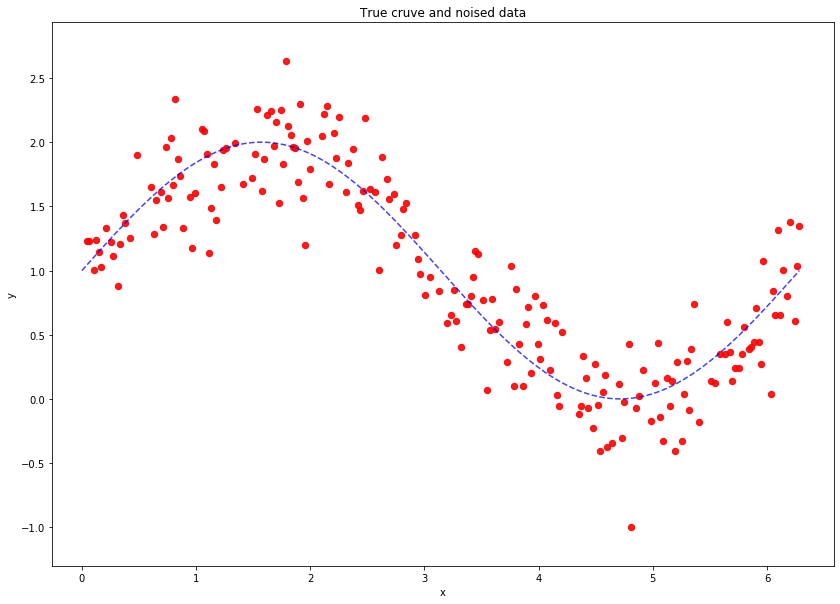

In [5]:



margin = 0.3
sup = sup.reshape((-1,1))
plt.rcParams['figure.figsize'] = (14,10)

plt.plot(sup, val, 'b--', alpha=0.75, label='curve')
plt.scatter(X, y, 40, 'r', 'o', alpha=0.9, label='data')

plt.xlim(X.min() - margin, X.max() + margin)
plt.ylim(y.min() - margin, y.max() + margin)
plt.title('True cruve and noised data')
plt.xlabel('x')
plt.ylabel('y')

(300, 1)


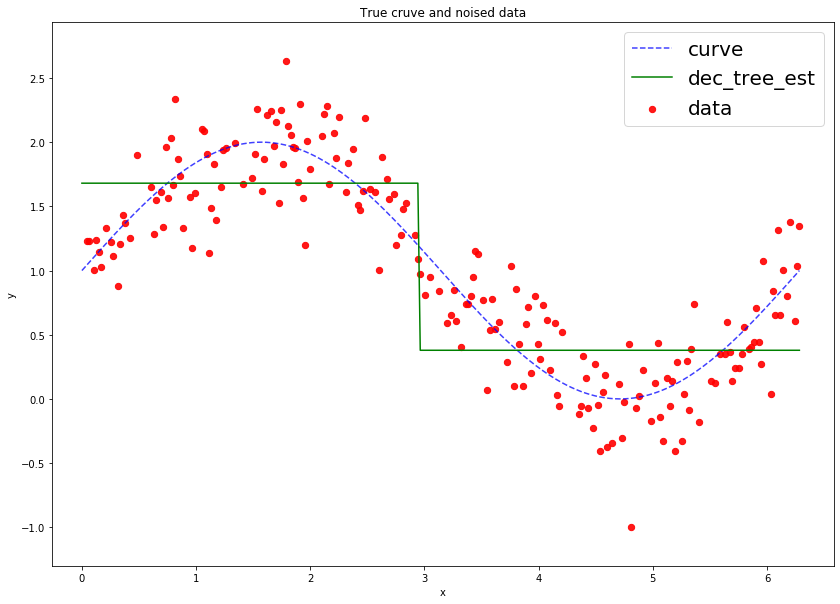

In [6]:
margin = 0.3
sup = sup.reshape((-1,1))
plt.rcParams['figure.figsize'] = (14,10)

plt.plot(sup, val, 'b--', alpha=0.75, label='curve')
plt.scatter(X, y, 40, 'r', 'o', alpha=0.9, label='data')

plt.xlim(X.min() - margin, X.max() + margin)
plt.ylim(y.min() - margin, y.max() + margin)
plt.title('True cruve and noised data')
plt.xlabel('x')
plt.ylabel('y')

print (sup.shape)

clf = tree.DecisionTreeRegressor(max_depth=1)
clf.fit(X,y)
y_hat = clf.predict(sup)
plt.plot(sup, y_hat, c="g", label="dec_tree_est")
plt.legend(loc='upper right', prop={'size': 20})

plt.show()


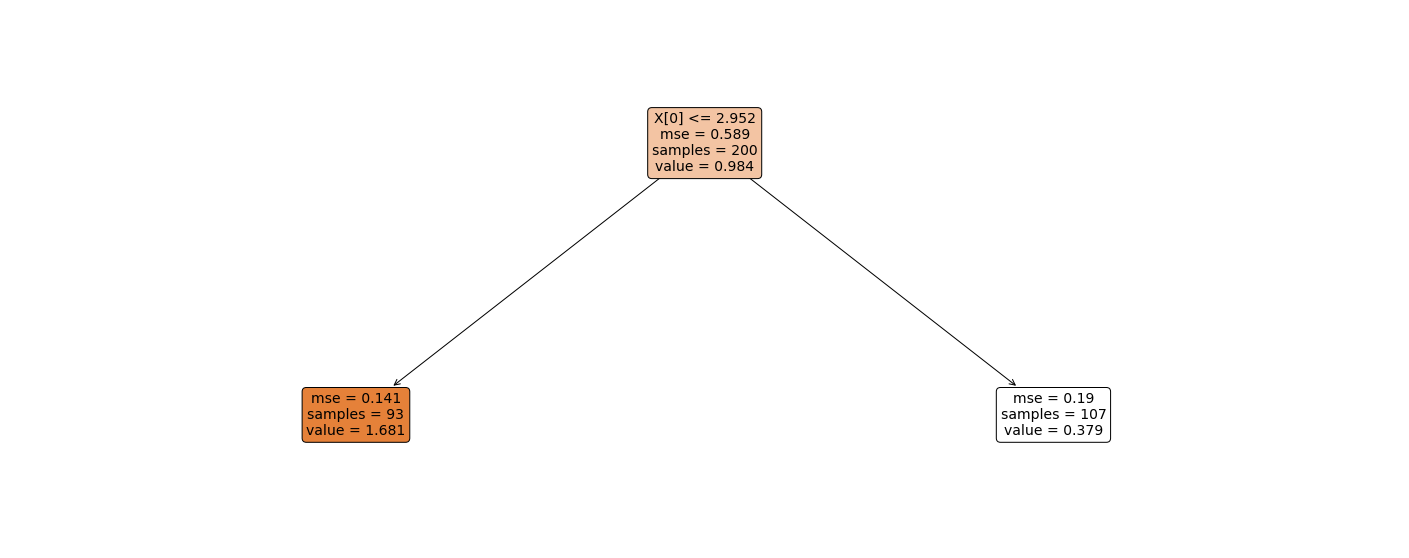

In [7]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,10))

plot_tree(clf, 
              filled=True, 
              rounded=True, 
              fontsize=14);

In [8]:
from sklearn.metrics import mean_squared_error

# split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.9, random_state = 8)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, train_size= 0.7, random_state = 8)

mse = []
mse_train = []
for max_depth in range(1,30):
    clf_tree = tree.DecisionTreeRegressor(max_depth=max_depth)
    clf_tree.fit(X_train, y_train)
    y_hat_validation = clf_tree.predict(X_validation)
    y_hat_train = clf_tree.predict(X_train)

    mse.append(mean_squared_error(y_hat_validation, y_validation))
    mse_train.append(mean_squared_error(y_hat_train, y_train))


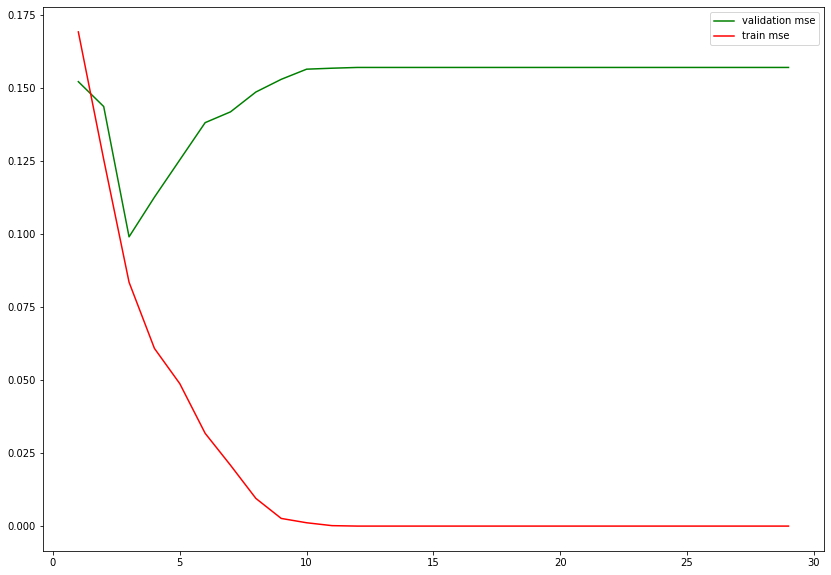

In [9]:
import seaborn as sns
sns.lineplot(x= range(1,len(mse)+1), y=mse, color= "green", label = "validation mse")
sns.lineplot(x= range(1,len(mse_train)+1), y=mse_train, color= "red", label = "train mse");

In [10]:
best_max_depth = np.argmin(mse)+1

In [11]:
best_max_depth

3

(300, 1)


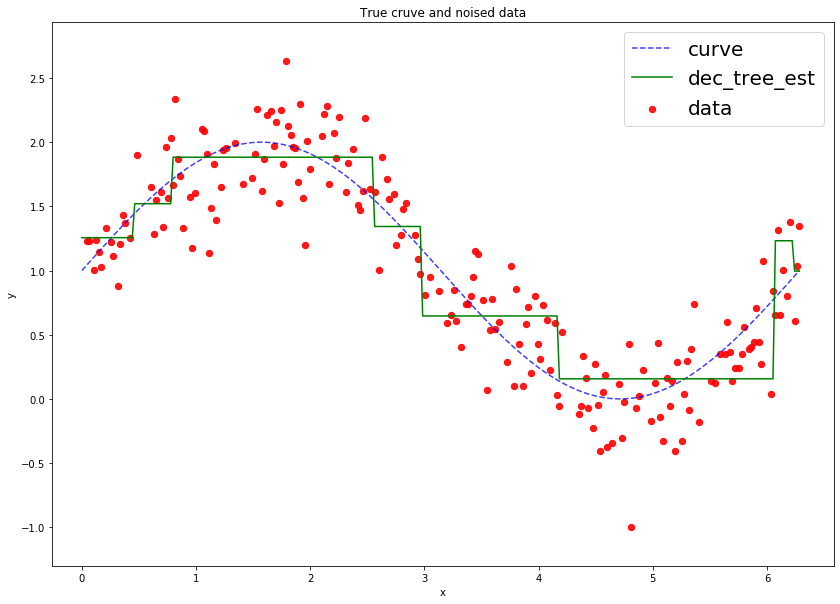

In [12]:
margin = 0.3
sup = sup.reshape((-1,1))
plt.rcParams['figure.figsize'] = (14,10)

plt.plot(sup, val, 'b--', alpha=0.75, label='curve')
plt.scatter(X, y, 40, 'r', 'o', alpha=0.9, label='data')

plt.xlim(X.min() - margin, X.max() + margin)
plt.ylim(y.min() - margin, y.max() + margin)
plt.title('True cruve and noised data')
plt.xlabel('x')
plt.ylabel('y')

print (sup.shape)

clf = tree.DecisionTreeRegressor(max_depth=best_max_depth)
clf.fit(X_train, y_train)
y_hat = clf.predict(sup)
plt.plot(sup, y_hat, c="g", label="dec_tree_est")
plt.legend(loc='upper right', prop={'size': 20})

plt.show()


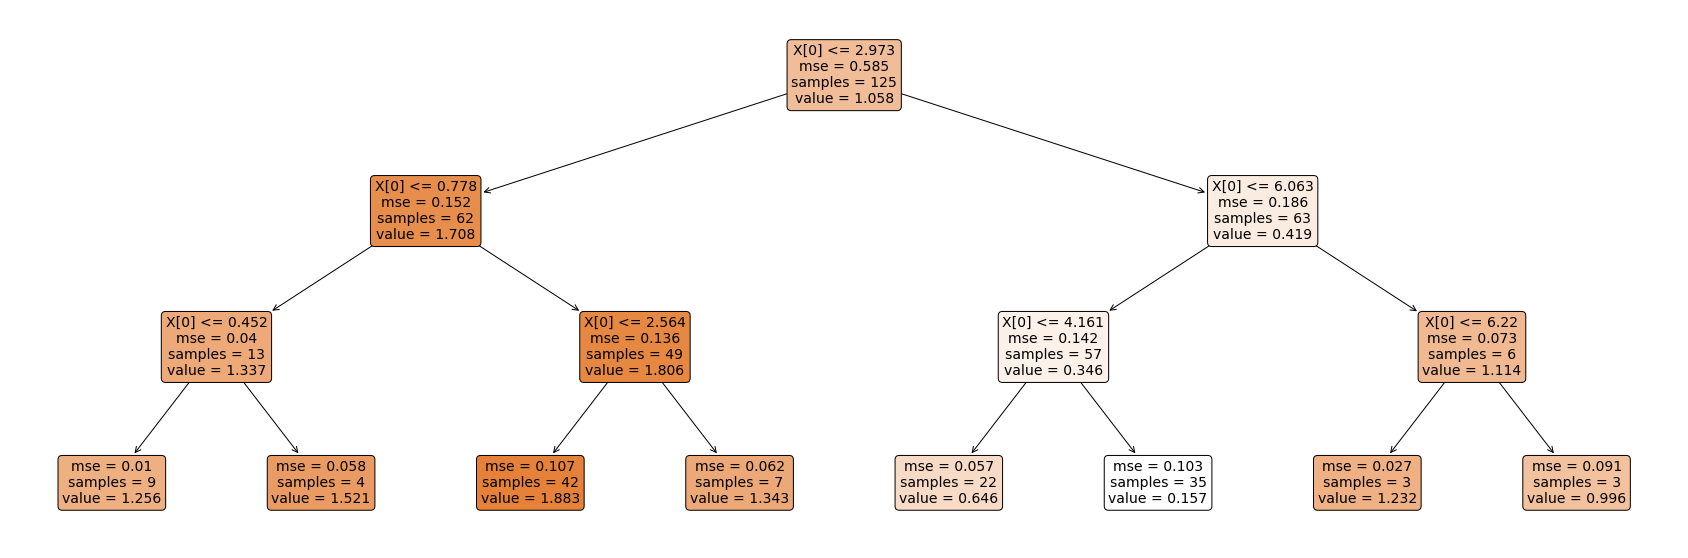

In [19]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,10))

plot_tree(clf, 
              filled=True, 
              rounded=True, 
              fontsize=14);

In [14]:
y_hat_validation = clf.predict(X_validation)
y_hat_train = clf.predict(X_train)
y_hat_test = clf.predict(X_test)

In [15]:
mean_squared_error(y_hat_train, y_train)


0.08353976430055636

In [16]:
mean_squared_error(y_hat_validation, y_validation)


0.09909834085462325

In [17]:
mean_squared_error(y_hat_test, y_test)


0.18577105223093499